
# HUCs Analysis with Geopandas

In this notebook, we analyze Hydrologic Unit Codes (HUCs) using shapefiles. We focus on identifying and plotting adjacent HUCs surrounding a specific HUC8s_roughcut area.


In [9]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile
import os
import shapely


## Extracting Shapefiles from ZIP

First, we extract the shapefiles from the provided ZIP archive.


In [10]:
# Path to the zip file containing shapefiles
shps_zip_path = 'Z:/LWI2023-24/HUC8s_Identification/SHPs.zip'

# Extract the shapefiles from the ZIP file
with zipfile.ZipFile(shps_zip_path, 'r') as zip_ref:
    extract_path = 'Z:/LWI2023-24/HUC8s_Identification/extracted_shps/SHPs'
    zip_ref.extractall(extract_path)

# List the contents to verify
extracted_files = os.listdir(extract_path)
print(extracted_files)



['SHPs', 'WBDHU8-1.dbf', 'WBDHU8-1.prj', 'WBDHU8-1.shp', 'WBDHU8-1.shx', 'WBDHU8-2.dbf', 'WBDHU8-2.prj', 'WBDHU8-2.shp', 'WBDHU8-2.shx', 'WBDHU8-3.dbf', 'WBDHU8-3.prj', 'WBDHU8-3.shp', 'WBDHU8-3.shx', 'WBDHU8-4.dbf', 'WBDHU8-4.prj', 'WBDHU8-4.shp', 'WBDHU8-4.shx']


## Loading the HUC8s Roughcut Shapefile

Next, we load the HUC8s_roughcut shapefile.


In [11]:
# Path to the HUC8s_roughcut shapefile
huc8_roughcut_shp_path = "Z:\LWI2023-24\HUC8s_Identification\SHPs\HUC8s_roughcut.shp"

# Load the HUC8s_roughcut shapefile
huc8_roughcut_gdf = gpd.read_file(huc8_roughcut_shp_path)
huc8_roughcut_gdf.head()


,Source,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc8,name,shape_Leng,shape_Area,ObjectID,geometry
0,WBDHU8,{C6163825-36ED-4ED3-B8BF-E454892F8B9A},{9B974F85-8C9A-4C83-BEFE-4220D5A05E4C},NaN,U.S. Geological Survey,NaN,2023-04-07,NaN,1694147.95,6855.98,"LA,TX",12010005,Lower Sabine,NaN,NaN,88,"POLYGON ((-93.65295 30.32139, -93.65332 30.319..."
1,WBDHU8,{30C74206-557A-450F-B887-BFA41368FAE9},{C46111AE-690C-4F51-82EE-30220C42688D},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,NaN,2021-05-24,NaN,1516326.35,6136.36,"LA,TX",12010004,Toledo Bend Reservoir,NaN,NaN,98,"POLYGON ((-93.96285 32.22747, -93.96155 32.227..."
2,WBDHU8,{0DD25F4A-CC77-48F7-A4AD-7F697B6F8908},{EDE841B8-7A04-4693-92AA-4277D5B53276},NaN,U.S. Geological Survey,NaN,2022-01-13,NaN,773568.99,3130.53,"LA,MS",03180005,Bogue Chitto,NaN,NaN,19,"POLYGON ((-90.46779 31.63848, -90.46712 31.638..."
3,WBDHU8,{FA257971-07B6-4BAD-A7EB-D87111D98160},{EDE841B8-7A04-4693-92AA-4277D5B53276},NaN,U.S. Geological Survey,NaN,2022-01-13,NaN,1821480.35,7371.28,"AL,LA,MS",03170009,Mississippi Coastal,NaN,NaN,20,"POLYGON ((-89.57914 31.07893, -89.57886 31.078..."
4,WBDHU8,{91D4207E-5141-4525-B7D4-C18BEE0A1AA0},{ADA3B896-18A1-44B9-AE66-A25A1CCD5AF1},NaN,U.S. Geological Survey,NaN,2022-02-23,NaN,1164874.39,4714.08,"LA,MS",03180004,Lower Pearl,NaN,NaN,25,"POLYGON ((-89.70903 31.42777, -89.70837 31.427..."


## Loading Additional Shapefiles

Now, let's load the additional shapefiles that were extracted from the ZIP.


In [12]:
# Load the extracted shapefiles
shp_gdfs = [gpd.read_file(os.path.join(extract_path, file)) for file in extracted_files if file.endswith('.shp')]

# Check the number of shapefiles loaded
len(shp_gdfs)


4

## Identifying Adjacent HUCs

We identify HUCs that are adjacent to the HUC8s_roughcut area.


In [13]:
# Create a single geometry for the HUC8s_roughcut area
huc8_roughcut_union = huc8_roughcut_gdf.unary_union

# Filter out only the adjacent HUCs
adjacent_hucs_gdfs = []
for gdf in shp_gdfs:
    adjacent_hucs = gdf[gdf.geometry.apply(lambda x: x.touches(huc8_roughcut_union))]
    if not adjacent_hucs.empty:
        adjacent_hucs_gdfs.append(adjacent_hucs)


C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(fun

## Plotting the HUC8s Roughcut and Adjacent HUCs

Finally, we plot the HUC8s_roughcut area along with the adjacent HUCs, and annotate the HUC numbers.


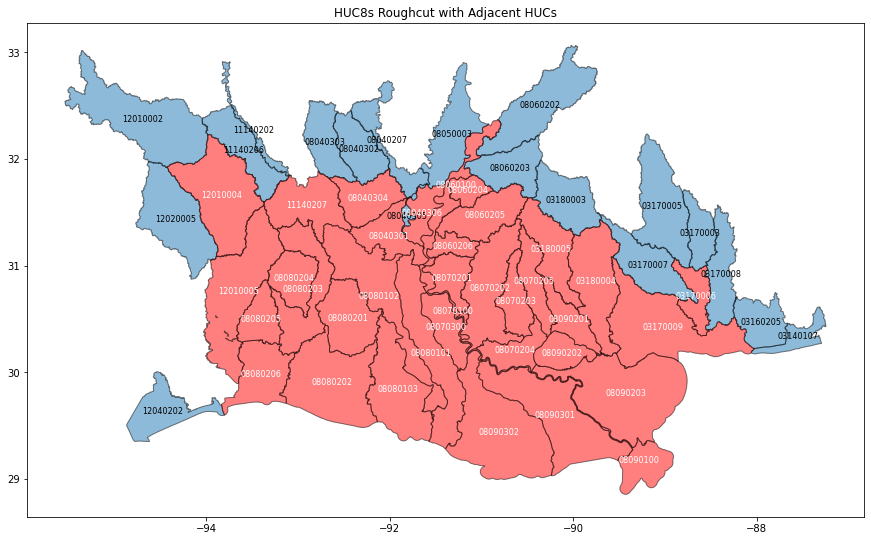

In [14]:
# Plotting HUC8s_roughcut with adjacent HUCs
fig, ax = plt.subplots(figsize=(15, 15))

# Plot adjacent HUCs
for gdf in adjacent_hucs_gdfs:
    gdf.plot(ax=ax, alpha=0.5, edgecolor='black')
    # Annotating HUC numbers
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='black')

# Plot HUC8s_roughcut area on top
huc8_roughcut_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
# Annotate HUC numbers
for idx, row in huc8_roughcut_gdf.iterrows():
    plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=8, color='white')

ax.set_title('HUC8s Roughcut with Adjacent HUCs')
plt.show()


## Adding Specific HUC8s and Coloring Adjacent HUCs

We will now add specific HUC8s to the plot and make the color of adjacent HUCs light blue. We also annotate the HUC numbers for better identification.


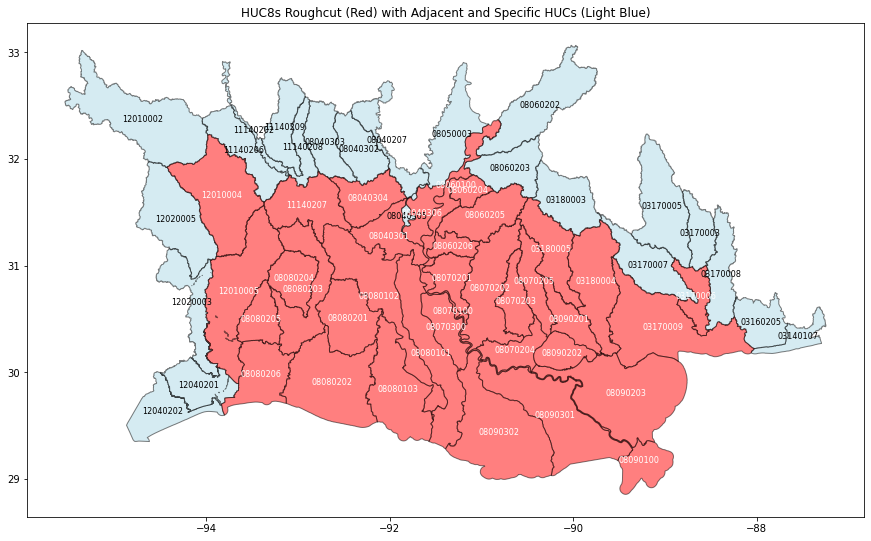

In [16]:
# Identifying the specific HUCs to be added
additional_hucs_to_plot = ['12020003', '12040201', '11140208', '11140209']

# Filtering for the additional specified HUCs
additional_hucs_gdfs = []
for gdf in shp_gdfs:
    additional_hucs = gdf[gdf['huc8'].isin(additional_hucs_to_plot)]
    if not additional_hucs.empty:
        additional_hucs_gdfs.append(additional_hucs)

# Plotting HUC8s_roughcut in red with adjacent HUCs and specific HUCs all in light blue
fig, ax = plt.subplots(figsize=(15, 15))

# Plot each of the adjacent HUCs and additional specified HUCs in light blue
for gdf in adjacent_hucs_gdfs + additional_hucs_gdfs:
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
    # Annotate HUC numbers
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='black')

# Now plot the HUC8s_roughcut area on top in red
huc8_roughcut_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
# Annotate HUC numbers for HUC8s_roughcut
for idx, row in huc8_roughcut_gdf.iterrows():
    plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=8, color='white')

ax.set_title('HUC8s Roughcut (Red) with Adjacent and Specific HUCs (Light Blue)')
plt.show()


## Adding Specific HUC8s and Coloring without Adjacent HUCs

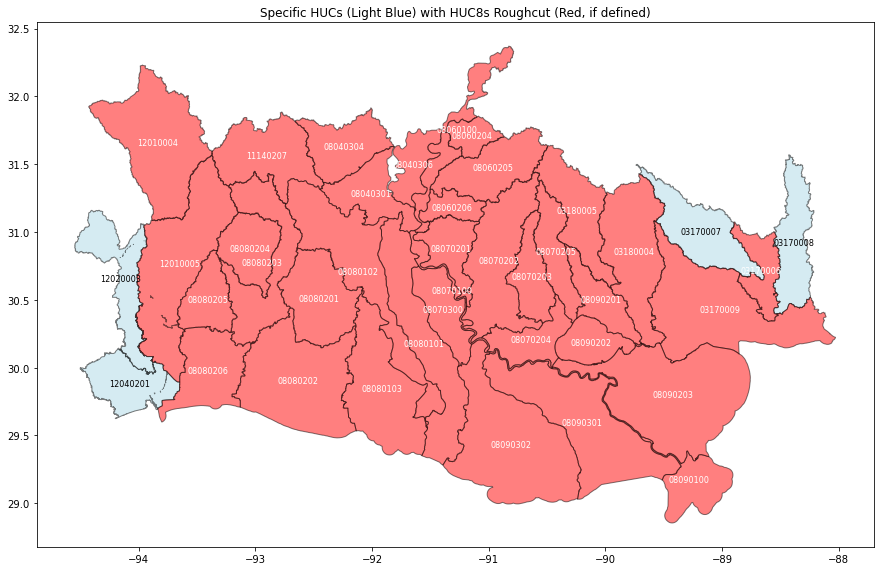

In [18]:
additional_hucs_to_plot = ['12020003', '12040201', '03170007', '03170008']

# Filtering for the additional specified HUCs
additional_hucs_gdfs = []
for gdf in shp_gdfs:
    additional_hucs = gdf[gdf['huc8'].isin(additional_hucs_to_plot)]
    if not additional_hucs.empty:
        additional_hucs_gdfs.append(additional_hucs)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot each of the additional specified HUCs in light blue
for gdf in additional_hucs_gdfs:
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
    # Annotate HUC numbers
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='black')

# Assuming huc8_roughcut_gdf is defined elsewhere in your script
# Plot the HUC8s_roughcut area on top in red
if 'huc8_roughcut_gdf' in locals() or 'huc8_roughcut_gdf' in globals():
    huc8_roughcut_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
    # Annotate HUC numbers for HUC8s_roughcut
    for idx, row in huc8_roughcut_gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='white')

ax.set_title('Specific HUCs (Light Blue) with HUC8s Roughcut (Red, if defined)')
plt.show()


## Saving as shapefile

In [19]:
# Combine all the GeoDataFrames into one
combined_gdf = gpd.GeoDataFrame(pd.concat([huc8_roughcut_gdf] + additional_hucs_gdfs, ignore_index=True))

# Setting the CRS (Coordinate Reference System) to match the original HUC8s_roughcut GeoDataFrame
# This step is important to ensure geographic consistency
combined_gdf.crs = huc8_roughcut_gdf.crs

# Path to save the new shapefile
output_path = 'Z:/LWI2023-24/HUC8s_Identification/combined_additional_shapefile'

# Save the combined GeoDataFrame as a shapefile
combined_gdf.to_file(output_path, driver='ESRI Shapefile')


## Removing Specific HUC8s from the Plot

We will now modify the plot to exclude specific HUC8s (12020003, 12040201, 11140208, 11140209) from the visualization.


C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


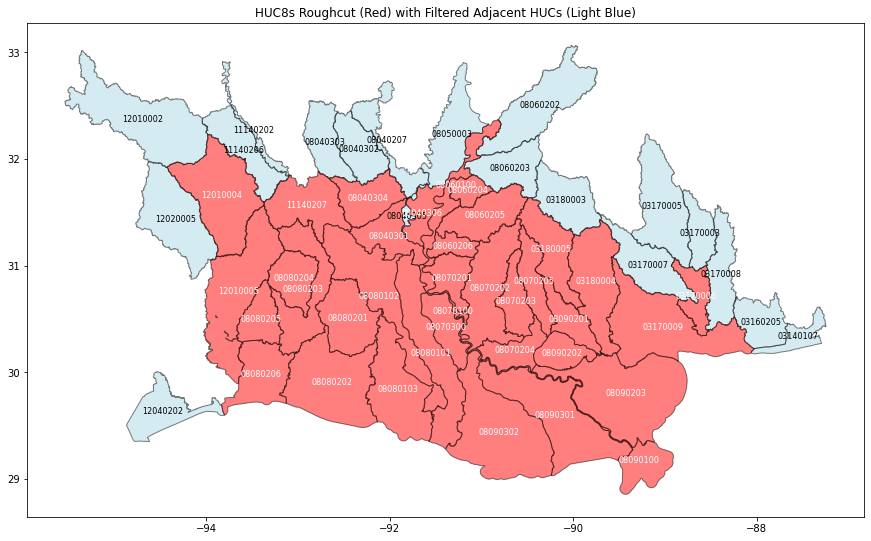

In [18]:
# List of specific HUC8s to be excluded
hucs_to_exclude = ['12020003', '12040201', '11140208', '11140209']

# Filter out the specific HUC8s from the adjacent and additional HUCs GeoDataFrames
filtered_adjacent_hucs_gdfs = [gdf[~gdf['huc8'].isin(hucs_to_exclude)] for gdf in adjacent_hucs_gdfs]
filtered_additional_hucs_gdfs = [gdf[~gdf['huc8'].isin(hucs_to_exclude)] for gdf in additional_hucs_gdfs]

# Plotting HUC8s_roughcut with remaining adjacent HUCs after exclusion
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the remaining adjacent HUCs in light blue
for gdf in filtered_adjacent_hucs_gdfs + filtered_additional_hucs_gdfs:
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
    # Annotate HUC numbers
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='black')

# Plot HUC8s_roughcut area on top in red
huc8_roughcut_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
# Annotate HUC numbers for HUC8s_roughcut
for idx, row in huc8_roughcut_gdf.iterrows():
    plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=8, color='white')

ax.set_title('HUC8s Roughcut (Red) with Filtered Adjacent HUCs (Light Blue)')
plt.show()


## Adding Specific HUC8s and Coloring Adjacent HUCs back

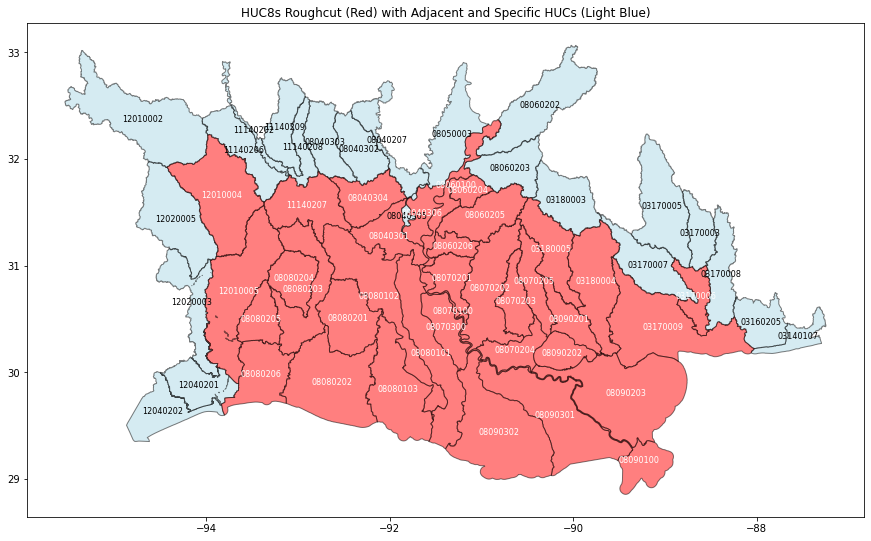

In [20]:
# Identifying the specific HUCs to be added
additional_hucs_to_plot = ['12020003', '12040201', '11140208', '11140209']

# Filtering for the additional specified HUCs
additional_hucs_gdfs = []
for gdf in shp_gdfs:
    additional_hucs = gdf[gdf['huc8'].isin(additional_hucs_to_plot)]
    if not additional_hucs.empty:
        additional_hucs_gdfs.append(additional_hucs)

# Plotting HUC8s_roughcut in red with adjacent HUCs and specific HUCs all in light blue
fig, ax = plt.subplots(figsize=(15, 15))

# Plot each of the adjacent HUCs and additional specified HUCs in light blue
for gdf in adjacent_hucs_gdfs + additional_hucs_gdfs:
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
    # Annotate HUC numbers
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', va='center', fontsize=8, color='black')

# Now plot the HUC8s_roughcut area on top in red
huc8_roughcut_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
# Annotate HUC numbers for HUC8s_roughcut
for idx, row in huc8_roughcut_gdf.iterrows():
    plt.annotate(text=row['huc8'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=8, color='white')

ax.set_title('HUC8s Roughcut (Red) with Adjacent and Specific HUCs (Light Blue)')
plt.show()


## Saving the Combined GeoDataFrame as a Shapefile

We will now save the combined GeoDataFrame, which includes the HUC8s_roughcut, adjacent HUCs, and specific HUC8s, as a shapefile with all the necessary formats (.shp, .dbf, .prj, and .shx).


In [17]:
# Combine all the GeoDataFrames into one
combined_gdf = gpd.GeoDataFrame(pd.concat([huc8_roughcut_gdf] + adjacent_hucs_gdfs + additional_hucs_gdfs, ignore_index=True))

# Setting the CRS (Coordinate Reference System) to match the original HUC8s_roughcut GeoDataFrame
# This step is important to ensure geographic consistency
combined_gdf.crs = huc8_roughcut_gdf.crs

# Path to save the new shapefile
output_path = 'Z:/LWI2023-24/HUC8s_Identification/combined_shapefile'

# Save the combined GeoDataFrame as a shapefile
combined_gdf.to_file(output_path, driver='ESRI Shapefile')
